In [38]:
import backtrader as bt
from datetime import datetime, date
import backtrader as bt
import pandas as pd
from ib_insync import *
from Learning.algo_trading_components.Backtesting.backtrader.strategies import TestStrategy, TestStrategy2
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
%matplotlib inline

# 1. test with yf first -- make sure everything works

In [4]:
ticker = "NVDA"
start='2013-01-01'
end='2022-12-31'
yf_data = yf.download(ticker, start=start, end=end)
data = bt.feeds.PandasData(dataname=yf_data)

/Users/Ethan/anaconda3/envs/AlgoTrading/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [6]:
cerebro = bt.Cerebro()
cerebro.addstrategy(bt.Strategy)
cerebro.adddata(data)
cerebro.broker.setcash(100000.0)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]

# 2. ib_insync

In [7]:
ib = IB()
util.startLoop()  # uncomment this line when in a notebook

In [8]:
ib.connect('127.0.0.1', 7497, clientId=35)

<IB connected to 127.0.0.1:7497 clientId=35>

In [9]:
ib.isConnected()

True

In [10]:
contract = Stock('NVDA', 'SMART', 'USD')

In [17]:
bars = ib.reqHistoricalData(
    contract, endDateTime=datetime(2024, 1, 1), durationStr='10 Y',
    barSizeSetting='1 day', whatToShow='TRADES', useRTH=True)

# convert to pandas dataframe (pandas needs to be installed):
df = util.df(bars)
df

,date,open,high,low,close,volume,average,barCount
0,2014-01-02,3.98,4.00,3.93,3.97,247168.00,3.96325,22076
1,2014-01-03,3.97,3.98,3.90,3.92,217136.00,3.92925,24963
2,2014-01-06,3.96,4.00,3.92,3.97,336128.00,3.96325,39441
3,2014-01-07,4.01,4.05,3.98,4.04,287744.00,4.02750,33365
4,2014-01-08,4.05,4.11,4.04,4.09,246464.00,4.08225,28300
...,...,...,...,...,...,...,...,...
2511,2023-12-22,491.99,493.83,484.67,488.30,185940.41,489.84300,76633
2512,2023-12-26,489.68,496.00,489.60,492.79,168794.22,493.71700,70852
2513,2023-12-27,495.10,496.80,490.85,494.17,167966.26,493.52300,68565
2514,2023-12-28,496.50,498.84,494.12,495.22,177415.86,496.48300,79209


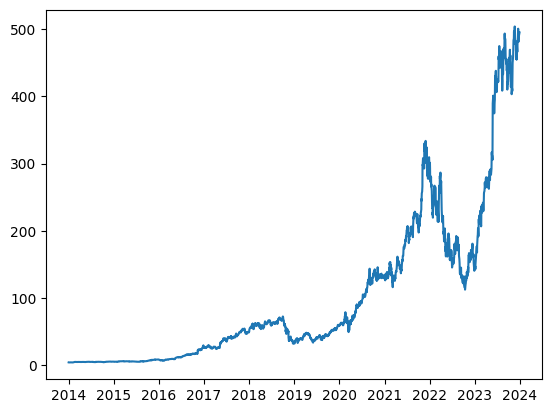

In [24]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['close'])

## directly feed df to cerebro

In [25]:
cerebro = bt.Cerebro()
cerebro.addstrategy(bt.Strategy)
data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)
cerebro.broker.setcash(100000.0)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()

Starting Portfolio Value: 100000.00


AttributeError: 'int' object has no attribute 'to_pydatetime'

Direct feeding won't work because the elements of the 'date' column have type date while datetime is needed

In [28]:
df['date'] = pd.to_datetime(df['date'])
df

,date,open,high,low,close,volume,average,barCount
0,2014-01-02,3.98,4.00,3.93,3.97,247168.00,3.96325,22076
1,2014-01-03,3.97,3.98,3.90,3.92,217136.00,3.92925,24963
2,2014-01-06,3.96,4.00,3.92,3.97,336128.00,3.96325,39441
3,2014-01-07,4.01,4.05,3.98,4.04,287744.00,4.02750,33365
4,2014-01-08,4.05,4.11,4.04,4.09,246464.00,4.08225,28300
...,...,...,...,...,...,...,...,...
2511,2023-12-22,491.99,493.83,484.67,488.30,185940.41,489.84300,76633
2512,2023-12-26,489.68,496.00,489.60,492.79,168794.22,493.71700,70852
2513,2023-12-27,495.10,496.80,490.85,494.17,167966.26,493.52300,68565
2514,2023-12-28,496.50,498.84,494.12,495.22,177415.86,496.48300,79209


In [33]:
df['date'][0]

Timestamp('2014-01-02 00:00:00')

In [36]:
df.set_index('date', inplace=True)


In [37]:
cerebro = bt.Cerebro()
cerebro.addstrategy(bt.Strategy)
data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)
cerebro.broker.setcash(100000.0)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]

So, that's great. That works!!!

In [39]:
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy2)
data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)
cerebro.broker.setcash(100000.0)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()

Starting Portfolio Value: 100000.00
2014-01-02, Close, 3.97
2014-01-03, Close, 3.92
2014-01-03, BUY CREATE, 3.92
2014-01-06, BUY EXECUTED, 3.96
2014-01-06, Close, 3.97
2014-01-07, Close, 4.04
2014-01-08, Close, 4.09
2014-01-09, Close, 3.94
2014-01-10, Close, 3.93
2014-01-13, Close, 3.84
2014-01-13, SELL CREATE, 3.84
2014-01-14, SELL EXECUTED, 3.84
2014-01-14, Close, 3.96
2014-01-15, Close, 4.00
2014-01-16, Close, 4.02
2014-01-17, Close, 4.00
2014-01-21, Close, 4.01
2014-01-22, Close, 4.01
2014-01-23, Close, 3.99
2014-01-24, Close, 3.89
2014-01-24, BUY CREATE, 3.89
2014-01-27, BUY EXECUTED, 3.89
2014-01-27, Close, 3.87
2014-01-28, Close, 3.90
2014-01-29, Close, 3.87
2014-01-30, Close, 3.93
2014-01-31, Close, 3.93
2014-02-03, Close, 3.87
2014-02-03, SELL CREATE, 3.87
2014-02-04, SELL EXECUTED, 3.87
2014-02-04, Close, 3.90
2014-02-05, Close, 3.86
2014-02-06, Close, 3.91
2014-02-07, Close, 3.97
2014-02-10, Close, 3.98
2014-02-11, Close, 4.06
2014-02-12, Close, 4.21
2014-02-13, Close, 4.34


[[<Figure size 1280x960 with 8 Axes>]]